In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

#Set the font
from matplotlib import font_manager
font_dirs = ['/home/user/gzhao/Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
   font_manager.fontManager.addfont(font_file)
   
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

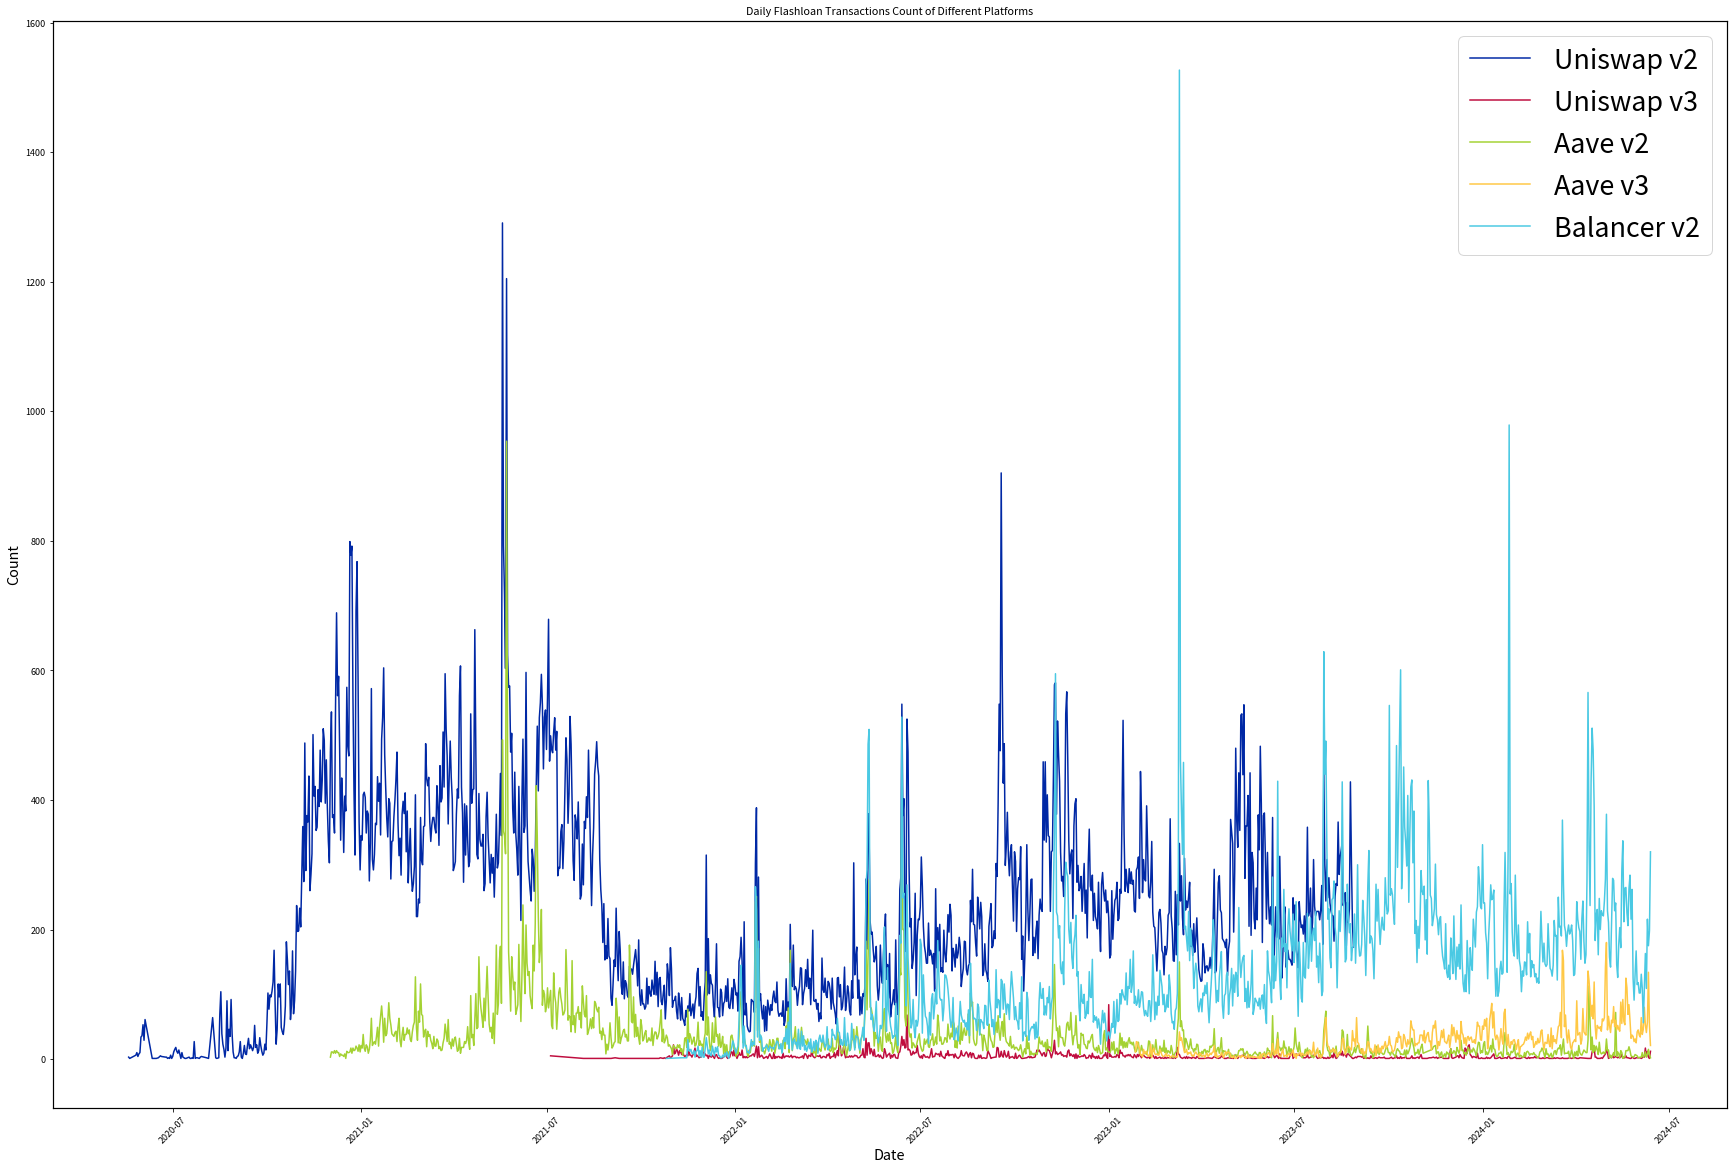

In [19]:
Uniswap_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_count.csv')
Uniswap_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_count.csv')
Aave_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_count.csv')
Aave_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_count.csv')
Balancer_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_count.csv')

Uniswap_v2_flashloan_count_df['date'] = pd.to_datetime(Uniswap_v2_flashloan_count_df['date'])
Uniswap_v3_flashloan_count_df['date'] = pd.to_datetime(Uniswap_v3_flashloan_count_df['date'])
Aave_v2_flashloan_count_df['date'] = pd.to_datetime(Aave_v2_flashloan_count_df['date'])
Aave_v3_flashloan_count_df['date'] = pd.to_datetime(Aave_v3_flashloan_count_df['date'])
Balancer_v2_flashloan_count_df['date'] = pd.to_datetime(Balancer_v2_flashloan_count_df['date'])

fig, ax = plt.subplots(figsize=(30, 20))

ax.plot(Uniswap_v2_flashloan_count_df['date'], Uniswap_v2_flashloan_count_df['daily_flash_tx_count'], label='Uniswap v2')
ax.plot(Uniswap_v3_flashloan_count_df['date'], Uniswap_v3_flashloan_count_df['daily_flash_tx_count'], label='Uniswap v3')
ax.plot(Aave_v2_flashloan_count_df['date'], Aave_v2_flashloan_count_df['daily_flash_tx_count'], label='Aave v2')
ax.plot(Aave_v3_flashloan_count_df['date'], Aave_v3_flashloan_count_df['daily_flash_tx_count'], label='Aave v3')
ax.plot(Balancer_v2_flashloan_count_df['date'], Balancer_v2_flashloan_count_df['daily_flash_tx_count'], label='Balancer v2')

ax.set_title('Daily Flashloan Transactions Count of Different Platforms')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right', fontsize=30)

fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_count_comparison.pdf')

plt.show()

/tmp/ipykernel_1333004/2138818928.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
/tmp/ipykernel_1333004/2138818928.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
/tmp/ipykernel_1333004/2138818928.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')


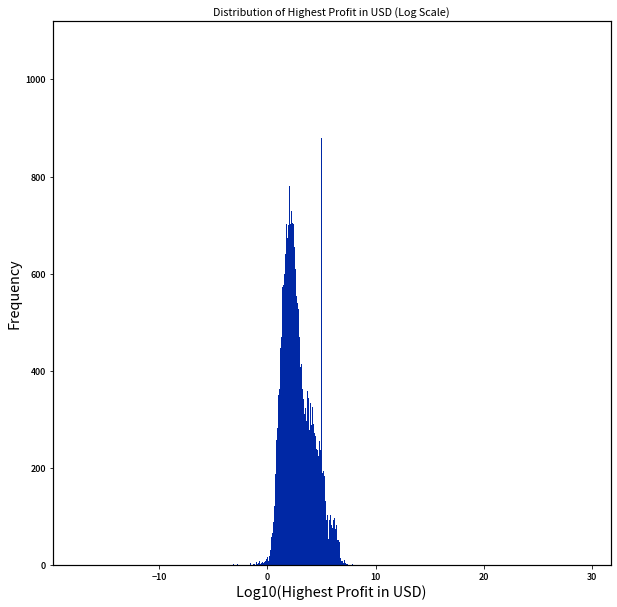

In [2]:
Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')
merged_flashloan_df = pd.concat([Uniswap_v2_df, Uniswap_v3_df, Aave_v2_df, Aave_v3_df, Balancer_v2_df], ignore_index=True)

# Filter the 'highest_profit_in_usd' column for values greater than 0
filtered_data = merged_flashloan_df['highest_profit_in_usd']
filtered_data = filtered_data[filtered_data > 0]

# Create the histogram on a log scale
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.log10(filtered_data), bins=10000)

ax.set_title('Distribution of Highest Profit in USD (Log Scale)')
ax.set_xlabel('Log10(Highest Profit in USD)')
ax.set_ylabel('Frequency')

fig.savefig('/home/user/gzhao/Thesis/result/Distribution_of_Highest_Profit_in_USD_Log_Scale.pdf')

plt.show()

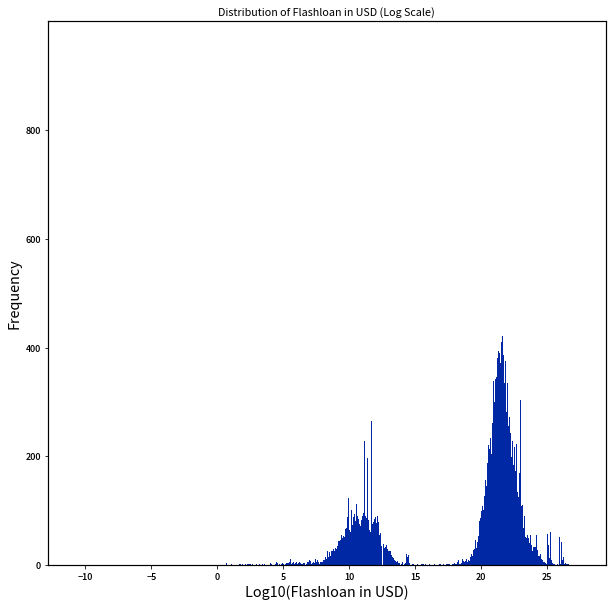

In [5]:
merged_flashloan_df['flashloan_in_usd'] = pd.to_numeric(merged_flashloan_df['flashloan_in_usd'], errors='coerce')
filtered_data = merged_flashloan_df['flashloan_in_usd'].dropna()
filtered_data = filtered_data[filtered_data > 0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.log10(filtered_data), bins=10000)

ax.set_title('Distribution of Flashloan in USD (Log Scale)')
ax.set_xlabel('Log10(Flashloan in USD)')
ax.set_ylabel('Frequency')

fig.savefig('/home/user/gzhao/Thesis/result/Distribution_of_Flash_Loan_in_USD_Log_Scale.pdf')

plt.show()

In [20]:
counts = [
    len(Uniswap_v2_df),
    len(Uniswap_v3_df),
    len(Aave_v2_df),
    len(Aave_v3_df),
    len(Balancer_v2_df)
]
labels = ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']

# Function to display both the count and percentage
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct/100.*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(counts, labels=labels, autopct=lambda pct: autopct_format(pct, counts), startangle=90, wedgeprops={'width': 0.4})

center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

ax.axis('equal')
ax.legend()
ax.set_title('Percentage and Count of Transactions by Platforms')

fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Transaction_Count_and_Percentage.pdf')

plt.show()

NameError: name 'Uniswap_v2_df' is not defined

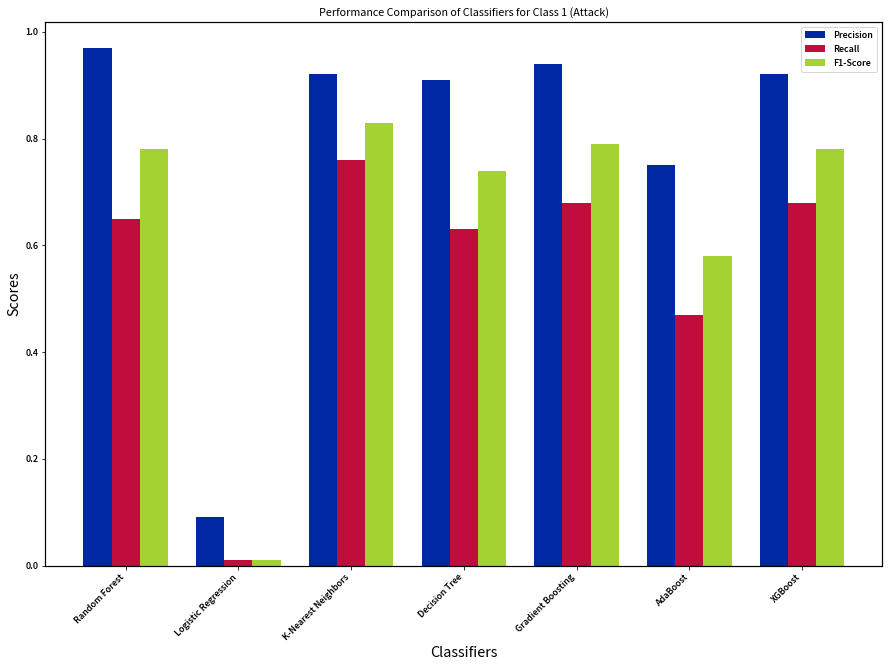

In [5]:
classifiers = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 
               'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
precision_scores = [0.97, 0.09, 0.92, 0.91, 0.94, 0.75, 0.92]
recall_scores = [0.65, 0.01, 0.76, 0.63, 0.68, 0.47, 0.68]
f1_scores = [0.78, 0.01, 0.83, 0.74, 0.79, 0.58, 0.78]


fig, ax = plt.subplots(figsize=(15, 10))

x = np.arange(len(classifiers))
width = 0.25

ax.bar(x - width, precision_scores, width, label='Precision')
ax.bar(x, recall_scores, width, label='Recall')
ax.bar(x + width, f1_scores, width, label='F1-Score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Classifiers for Class 1 (Attack)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

fig.savefig('/home/user/gzhao/Thesis/result/classifier_comparison.pdf')
plt.show()